In [192]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()
import pandas as pd

In [198]:
data_binance=cg.get_exchanges_by_id('binance')
df_binance =pd.DataFrame(data_binance['tickers'], columns=['base','target','volume','coin_id'])
df_binance.head()
#df_binance.tail()
df_binance['base']

0     BUSD
1      ETH
2      BTC
3     SHIB
4      BTC
      ... 
95     ENJ
96     ONE
97     HOT
98     ADA
99    GHST
Name: base, Length: 100, dtype: object

In [153]:
a = cg.get_coin_market_chart_range_by_id(id='bitcoin',vs_currency='usd',from_timestamp=1594087200,to_timestamp=1602179348)

a

{'prices': [[1594166400000, 9253.630980242333],
  [1594252800000, 9432.172515827939],
  [1594339200000, 9235.716302064242],
  [1594425600000, 9282.913638839902],
  [1594512000000, 9234.314674712627],
  [1594598400000, 9297.479635872663],
  [1594684800000, 9240.76251972468],
  [1594771200000, 9247.060695963813],
  [1594857600000, 9203.371435179699],
  [1594944000000, 9136.483376363976],
  [1595030400000, 9156.276583115488],
  [1595116800000, 9168.402736564132],
  [1595203200000, 9202.615839500108],
  [1595289600000, 9163.159654576915],
  [1595376000000, 9384.379751903267],
  [1595462400000, 9514.304987626969],
  [1595548800000, 9589.81771944117],
  [1595635200000, 9535.93879573746],
  [1595721600000, 9691.825138917147],
  [1595808000000, 9925.751397476346],
  [1595894400000, 10962.258481207355],
  [1595980800000, 10904.916526918994],
  [1596067200000, 11093.612240442404],
  [1596153600000, 11116.307163685275],
  [1596240000000, 11325.5515272739],
  [1596326400000, 11812.094307268515],
 

In [178]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
api_key = ''
api_secret = ''
client = Client(api_key, api_secret)


klines = client.get_historical_klines("ETHBUSD", Client.KLINE_INTERVAL_1DAY, "2019-02-05", "2020-02-05")

In [190]:
# https://medium.datadriveninvestor.com/using-python-to-get-crypto-market-data-ba173d93896b
info = client.get_all_tickers()
info = pd.DataFrame(info)
info

,symbol,price
0,ETHBTC,0.08039400
1,LTCBTC,0.00365000
2,BNBBTC,0.01073500
3,NEOBTC,0.00065800
4,QTUMETH,0.00353600
...,...,...
1796,RNDRUSDT,6.45900000
1797,RNDRBUSD,6.48100000
1798,ALCXBTC,0.00678000
1799,ALCXBUSD,391.70000000


In [180]:

df = pd.DataFrame(klines)

df.columns = ['open_time', 'o', 'h', 'l', 'c', 'v', 'close_time', 'qav', 'num_trades', 'taker_base_vol', 'taker_quote_vol', 'ignore']
df.index = [dt.datetime.fromtimestamp(x / 1000.0) for x in df.open_time]
df.drop(['open_time', 'close_time', 'ignore'], axis=1, inplace=True)
df.drop(['qav', 'num_trades', 'taker_base_vol','taker_quote_vol'], axis=1, inplace=True)
df

,o,h,l,c,v
2019-10-21 02:00:00,175.00000000,177.89000000,171.87000000,174.29000000,460.13617000
2019-10-22 02:00:00,174.24000000,175.13000000,170.34000000,171.31000000,647.82578000
2019-10-23 02:00:00,171.24000000,171.53000000,153.36000000,162.46000000,1130.90732000
2019-10-24 02:00:00,162.34000000,163.50000000,158.44000000,161.00000000,808.86735000
2019-10-25 02:00:00,161.02000000,186.73000000,161.00000000,181.74000000,1762.18861000
...,...,...,...,...,...
2020-02-01 01:00:00,179.80000000,184.02000000,179.08000000,183.52000000,1219.12090000
2020-02-02 01:00:00,183.21000000,193.36000000,179.00000000,188.10000000,2721.15596000
2020-02-03 01:00:00,188.03000000,195.31000000,186.51000000,189.48000000,2227.51558000
2020-02-04 01:00:00,189.82000000,191.20000000,184.42000000,188.36000000,1089.49756000


In [134]:
import pandas_datareader as web
import datetime as dt

start = dt.datetime(2020,1,1)
end = dt.datetime.now()
print(int(end))

ltc = web.DataReader('ETH-USD', 'yahoo', start, end)
ltc

TypeError: int() argument must be a string, a bytes-like object or a number, not 'datetime.datetime'

In [250]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ["kim kardashian","soy boy"] # list of keywords to get data 
 

#pytrends.build_payload(kw_list, cat=0, timeframe='today 1-m') 
pytrends.get_historical_interest(kw_list, year_start=2020, month_start=8, day_start=1, hour_start=0, year_end=2021, month_end=9, day_end=30, hour_end=0, cat=0, sleep=0)
data = pytrends.interest_over_time() 
data = data.reset_index() 
print(data)

HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
Empty DataFrame
Columns: [index]
Index: []


In [ ]:
plt.plot(data['kim kardashian'])
plt.plot(data['soy boy'])
plt.show

In [130]:
import yfinance as yf
import datetime as dt

start = dt.datetime(2020,1,1)
end = dt.datetime.now()

eth = yf.download('BTC', start, end)
eth

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-01,100.000000,100.000000,100.000000,100.000000,100.000000,0
2020-10-02,100.000000,100.000000,100.000000,100.000000,100.000000,0
2020-10-05,100.029999,100.040001,99.995003,99.995003,99.995003,10725
2020-10-06,100.010002,100.029999,100.010002,100.029999,100.029999,10080
2020-10-07,99.949997,99.959999,99.919998,99.919998,99.919998,6350
...,...,...,...,...,...,...
2021-11-19,98.605003,98.605003,98.605003,98.605003,98.605003,338
2021-11-22,98.269997,98.269997,98.269997,98.269997,98.269997,26
2021-11-23,98.172501,98.172501,98.172501,98.172501,98.172501,4


In [1]:
import san
san.ApiConfig.api_key = 'api-key-provided-by-sanbase'

/home/remy/.local/lib/python3.8/site-packages/san/__init__.py:31: UserWarning: The package sanpy is out of date. Your version is 0.8.11, the latest is 0.8.12.
  warn(warning)


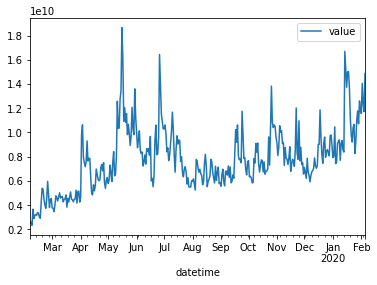

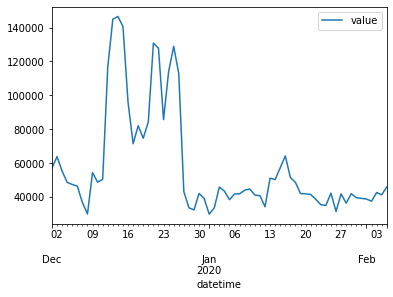

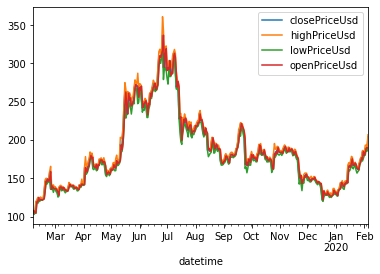

                           closePriceUsd  highPriceUsd  lowPriceUsd  \
datetime                                                              
2019-02-05 00:00:00+00:00     107.443520    108.140066   106.860934   
2019-02-06 00:00:00+00:00     104.919290    107.569302   102.927878   
2019-02-07 00:00:00+00:00     104.535299    106.068331   104.409134   
2019-02-08 00:00:00+00:00     119.267749    120.160493   104.194436   
2019-02-09 00:00:00+00:00     119.430883    120.756497   118.000401   
...                                  ...           ...          ...   
2020-02-01 00:00:00+00:00     183.673947    183.841659   179.745185   
2020-02-02 00:00:00+00:00     188.617538    193.059227   180.173944   
2020-02-03 00:00:00+00:00     189.861728    193.387197   188.108735   
2020-02-04 00:00:00+00:00     189.299102    191.111489   185.444274   
2020-02-05 00:00:00+00:00     204.129695    206.804001   188.775924   

                           openPriceUsd  
datetime                          

In [25]:

volume_df = san.get('volume_usd/ethereum', from_date='2019-02-05', to_date='2020-02-05', interval='1d')
volume_df.plot()
ohlc_df = san.get('ohlc/ethereum', from_date='2019-02-05', to_date='2020-02-05', interval='1d')
net_growth_df = san.get('network_growth/ethereum', from_date='2019-02-05', to_date='2020-02-05',interval='1d')
import matplotlib.pyplot as plt
net_growth_df.plot()
ohlc_df.plot()
plt.show()
print(ohlc_df)

In [40]:
allprod = san.get("projects/all")
allprod = 
allprod.head()


,marketSegment,name,slug,ticker,totalSupply
0,Platform,Color Platform,color-platform,CLR,350000000
1,Blockchain Network,Enecuum,enecuum,ENQ,197754361.048
2,Interoperability,Cosmos,cosmos,ATOM,283208161.910911
3,Financial,ZeuxCoin,zeuxcoin,ZUC,750000000
4,Energy,Treelion,treelion,TRN,1000000000


In [2]:
from datetime import date
from dateutil.relativedelta import relativedelta

today = date.today()

last_year = currentTimeDate = date.today() - relativedelta(years=1)
print("Today's date:", last_year)

Today's date: 2020-11-30


In [51]:
import numpy as np
import pandas as pd
import os
import time

In [102]:
def get_data(from_d, to_d, crypto):
    social_volume = san.get('social_volume_total/'+crypto, interval='1d',from_date=from_d,to_date=to_d)
    social_volume.columns = ['social volume']
    time.sleep(1)
    positive_sentiment = san.get('sentiment_positive_total/'+crypto, interval='1d',from_date=from_d,to_date=to_d)
    positive_sentiment.columns = ['positive sentiment']
    time.sleep(1)
    negative_sentiment = san.get('sentiment_negative_total/'+crypto, interval='1d',from_date=from_d,to_date=to_d)
    negative_sentiment.columns = ['negative sentiment']
    time.sleep(1)
    volume = san.get('volume_usd/'+crypto, from_date=from_d, to_date=to_d, interval='1d')
    time.sleep(1)
    volume.columns = ['volume']
    ohlc = san.get('ohlc/'+crypto, from_date=from_d, to_date=to_d, interval='1d')
    
    merged = social_volume
    merged = pd.merge(merged, positive_sentiment, how="inner", on="datetime")
    merged = pd.merge(merged, negative_sentiment, how="inner", on="datetime")
    merged = pd.merge(merged, volume, how="inner", on="datetime")
    merged = pd.merge(merged, ohlc, how="inner", on="datetime")

    return merged


In [215]:
def get_data(from_d, to_d, crypto, vstoken):
    klines = client.get_historical_klines(crypto+vstoken, Client.KLINE_INTERVAL_1DAY, from_d, to_d)
    df = pd.DataFrame(klines)

    df.columns = ['open_time', 'o', 'h', 'l', 'c', 'v', 'close_time', 'qav', 'num_trades', 'taker_base_vol', 'taker_quote_vol', 'ignore']
    df.index = [dt.datetime.fromtimestamp(x / 1000.0) for x in df.open_time]
    df.index.name = 'datetime'
    df.drop(['open_time', 'close_time', 'ignore'], axis=1, inplace=True)
    df.drop(['qav', 'num_trades', 'taker_base_vol','taker_quote_vol'], axis=1, inplace=True)
    return df

In [270]:
def update_dataset(proj_name, vstoken):
    allprod = san.get("projects/all")

    today = date.today()
    last_year = currentTimeDate = date.today() - relativedelta(years=1)
    today = str(today)
    last_year = str(last_year)


    filename = "data/"+proj_name+'.csv'

    if os.path.exists(filename):
        crypto_data = pd.read_csv(filename)  
        since_last = crypto_data.iloc[-1]['datetime']

        if since_last >= today:
            print('is up to date')
        else:
            print("updating")
            update = get_data(since_last, today, proj_name, vstoken)
            # we need to drop the first raw because it will be at double otherwise
            update = update.iloc[1: , :]
            crypto_data.append(update)
            update.to_csv(filename, mode='a', header=False)

    else:
        crypto_data = get_data(last_year, today, proj_name, vstoken)
        print(crypto_data)
        crypto_data.to_csv(filename)



In [281]:
print(df_binance)
yeah = update_dataset(df_binance['base'][0],df_binance['target'][0])
yeah
last_year = currentTimeDate = date.today() - relativedelta(years=1)
last_year

    base target        volume      coin_id
0   BUSD   USDT  1.204478e+09  binance-usd
1    ETH   USDT  7.107445e+05     ethereum
2    BTC   USDT  4.999017e+04      bitcoin
3   SHIB   USDT  6.296813e+13    shiba-inu
4    BTC   BUSD  1.285115e+04      bitcoin
..   ...    ...           ...          ...
95   ENJ   USDT  2.088620e+07    enjincoin
96   ONE   USDT  2.239630e+08      harmony
97   HOT   USDT  5.373430e+09    holotoken
98   ADA   BUSD  2.577784e+07      cardano
99  GHST   USDT  1.956078e+06   aavegotchi

[100 rows x 4 columns]
is up to date


datetime.date(2020, 11, 30)

In [271]:
print(df_binance.shape)
for coin in df_binance.values:
    if(coin[1] == 'USDT'):
        update_dataset(coin[0],coin[1])
        print(coin[0])

(100, 4)
                                o             h           l           c  \
datetime                                                                  
2019-09-20 02:00:00  238.70000000  306.09630000  0.00050000  1.00000000   
2019-09-21 02:00:00    1.00000000    1.00000000  0.99990000  0.99990000   
2019-09-22 02:00:00    0.99990000    1.00010000  0.99990000  0.99990000   
2019-09-23 02:00:00    0.99990000    1.00010000  0.99990000  1.00000000   
2019-09-24 02:00:00    1.00000000    1.04990000  0.99020000  0.99970000   
...                           ...           ...         ...         ...   
2021-11-26 01:00:00    0.99940000    0.99950000  0.99860000  0.99940000   
2021-11-27 01:00:00    0.99930000    0.99950000  0.99920000  0.99930000   
2021-11-28 01:00:00    0.99930000    0.99940000  0.99920000  0.99940000   
2021-11-29 01:00:00    0.99940000    0.99940000  0.99900000  0.99910000   
2021-11-30 01:00:00    0.99910000    0.99930000  0.99900000  0.99920000   

               

                                o             h             l             c  \
datetime                                                                      
2020-09-22 02:00:00    0.85000000    7.00000000    0.85000000    5.31930000   
2020-09-23 02:00:00    5.32790000    5.36000000    3.40000000    3.53500000   
2020-09-24 02:00:00    3.53050000    4.88730000    3.40330000    4.64110000   
2020-09-25 02:00:00    4.63660000    5.02340000    4.20010000    4.71340000   
2020-09-26 02:00:00    4.71640000    4.82000000    4.32940000    4.52000000   
...                           ...           ...           ...           ...   
2021-11-26 01:00:00  119.25000000  119.87000000  101.31000000  104.27000000   
2021-11-27 01:00:00  104.30000000  118.00000000  103.22000000  113.52000000   
2021-11-28 01:00:00  113.55000000  113.97000000  100.57000000  110.42000000   
2021-11-29 01:00:00  110.42000000  120.41000000  109.03000000  120.39000000   
2021-11-30 01:00:00  120.39000000  124.80000000  114

                              o           h           l           c  \
datetime                                                              
2020-08-06 02:00:00  0.05363000  0.12000000  0.05363000  0.05822000   
2020-08-07 02:00:00  0.05790000  0.07594000  0.05758000  0.07484000   
2020-08-08 02:00:00  0.07498000  0.10469000  0.07259000  0.10281000   
2020-08-09 02:00:00  0.10266000  0.13200000  0.09924000  0.09972000   
2020-08-10 02:00:00  0.09971000  0.11224000  0.09228000  0.10139000   
...                         ...         ...         ...         ...   
2021-11-26 01:00:00  5.19170000  5.45550000  4.34220000  4.66320000   
2021-11-27 01:00:00  4.66410000  4.92630000  4.34990000  4.69420000   
2021-11-28 01:00:00  4.69420000  5.15000000  4.27810000  5.14290000   
2021-11-29 01:00:00  5.14590000  5.23000000  4.80280000  4.88000000   
2021-11-30 01:00:00  4.88120000  4.93570000  4.53170000  4.64090000   

                                      v  
datetime                          

                                o             h             l             c  \
datetime                                                                      
2017-12-13 01:00:00  272.00000000  330.00000000  260.00000000  290.01000000   
2017-12-14 01:00:00  290.01000000  302.72000000  252.00000000  272.40000000   
2017-12-15 01:00:00  272.40000000  314.21000000  239.99000000  294.00000000   
2017-12-16 01:00:00  294.00000000  305.00000000  285.00000000  293.97000000   
2017-12-17 01:00:00  293.01000000  328.80000000  290.00000000  311.40000000   
...                           ...           ...           ...           ...   
2021-11-26 01:00:00  223.00000000  224.90000000  190.00000000  195.70000000   
2021-11-27 01:00:00  195.70000000  201.00000000  190.60000000  195.10000000   
2021-11-28 01:00:00  195.00000000  199.90000000  182.00000000  199.50000000   
2021-11-29 01:00:00  199.50000000  209.50000000  194.90000000  205.50000000   
2021-11-30 01:00:00  205.50000000  219.90000000  197

                                o             h             l             c  \
datetime                                                                      
2019-11-28 01:00:00  220.08000000  224.60000000  212.02000000  217.41000000   
2019-11-29 01:00:00  217.40000000  226.49000000  216.90000000  224.00000000   
2019-11-30 01:00:00  223.89000000  224.67000000  214.41000000  217.45000000   
2019-12-01 01:00:00  217.43000000  218.18000000  209.24000000  214.36000000   
2019-12-02 01:00:00  214.37000000  216.25000000  209.68000000  213.67000000   
...                           ...           ...           ...           ...   
2021-11-26 01:00:00  616.70000000  618.70000000  540.00000000  557.30000000   
2021-11-27 01:00:00  557.10000000  573.40000000  554.90000000  562.70000000   
2021-11-28 01:00:00  562.40000000  569.20000000  530.80000000  568.70000000   
2021-11-29 01:00:00  568.90000000  581.40000000  557.00000000  574.90000000   
2021-11-30 01:00:00  575.00000000  587.70000000  556

                               o            h            l            c  \
datetime                                                                  
2018-06-12 02:00:00  16.20000000  16.79990000  13.95000000  14.62820000   
2018-06-13 02:00:00  14.70000000  14.97310000  12.81300000  13.84990000   
2018-06-14 02:00:00  13.80030000  14.34090000  13.15000000  14.06240000   
2018-06-15 02:00:00  14.06620000  14.07480000  13.55550000  13.82000000   
2018-06-16 02:00:00  13.82000000  14.88000000  13.75990000  14.44000000   
...                          ...          ...          ...          ...   
2021-11-26 01:00:00  50.56000000  50.68000000  44.70000000  46.67000000   
2021-11-27 01:00:00  46.66000000  47.71000000  46.38000000  46.78000000   
2021-11-28 01:00:00  46.77000000  47.55000000  44.45000000  47.50000000   
2021-11-29 01:00:00  47.50000000  48.98000000  47.03000000  48.22000000   
2021-11-30 01:00:00  48.21000000  50.09000000  46.22000000  48.46000000   

                        

                                o             h             l             c  \
datetime                                                                      
2020-11-04 01:00:00    0.10000000    0.29000000    0.10000000    0.14583000   
2020-11-05 01:00:00    0.14617000    0.15082000    0.12620000    0.13450000   
2020-11-06 01:00:00    0.13410000    0.15029000    0.12100000    0.14400000   
2020-11-07 01:00:00    0.14312000    0.16985000    0.13418000    0.14076000   
2020-11-08 01:00:00    0.14079000    0.24200000    0.13844000    0.19846000   
...                           ...           ...           ...           ...   
2021-11-26 01:00:00  138.82000000  140.23000000  122.51000000  125.73000000   
2021-11-27 01:00:00  125.62000000  129.84000000  124.55000000  127.66000000   
2021-11-28 01:00:00  127.66000000  134.89000000  123.11000000  133.06000000   
2021-11-29 01:00:00  133.03000000  137.69000000  132.75000000  134.52000000   
2021-11-30 01:00:00  134.49000000  139.75000000  131

                              o           h           l           c  \
datetime                                                              
2018-05-31 02:00:00  0.28021000  0.30600000  0.28021000  0.29568000   
2018-06-01 02:00:00  0.29567000  0.29999000  0.27963000  0.28863000   
2018-06-02 02:00:00  0.28869000  0.30489000  0.28812000  0.29740000   
2018-06-03 02:00:00  0.29741000  0.31200000  0.29651000  0.30405000   
2018-06-04 02:00:00  0.30406000  0.31104000  0.28501000  0.29080000   
...                         ...         ...         ...         ...   
2021-11-26 01:00:00  0.34160000  0.35040000  0.30460000  0.32910000   
2021-11-27 01:00:00  0.32920000  0.33500000  0.32040000  0.32570000   
2021-11-28 01:00:00  0.32580000  0.32660000  0.30000000  0.32360000   
2021-11-29 01:00:00  0.32360000  0.33400000  0.32220000  0.32840000   
2021-11-30 01:00:00  0.32830000  0.35140000  0.32790000  0.34070000   

                                      v  
datetime                          

                              o           h           l           c  \
datetime                                                              
2019-07-23 02:00:00  0.01190000  0.01190000  0.00792000  0.00805000   
2019-07-24 02:00:00  0.00803000  0.00804000  0.00663000  0.00664000   
2019-07-25 02:00:00  0.00664000  0.00728000  0.00648000  0.00681000   
2019-07-26 02:00:00  0.00686000  0.00715000  0.00638000  0.00690000   
2019-07-27 02:00:00  0.00687000  0.00714000  0.00630000  0.00652000   
...                         ...         ...         ...         ...   
2021-11-26 01:00:00  0.12459000  0.19633000  0.12342000  0.17605000   
2021-11-27 01:00:00  0.17603000  0.21382000  0.16556000  0.17197000   
2021-11-28 01:00:00  0.17202000  0.18274000  0.14703000  0.16124000   
2021-11-29 01:00:00  0.16120000  0.16908000  0.15502000  0.15973000   
2021-11-30 01:00:00  0.15968000  0.16459000  0.14518000  0.14986000   

                                       v  
datetime                         

In [55]:
print(get_data('2019-02-05', '2020-02-05', 'treelion'))

                               value
datetime                            
2019-10-08 00:00:00+00:00  2012673.0
2019-10-09 00:00:00+00:00  4508622.0
2019-10-10 00:00:00+00:00  1226932.0
2019-10-11 00:00:00+00:00  1235500.0
2019-10-12 00:00:00+00:00  1143555.0
...                              ...
2020-02-01 00:00:00+00:00    50309.0
2020-02-02 00:00:00+00:00   418446.0
2020-02-03 00:00:00+00:00    75925.0
2020-02-04 00:00:00+00:00    93950.0
2020-02-05 00:00:00+00:00    69524.0

[121 rows x 1 columns]
                           social volume  positive sentiment  \
datetime                                                       
2019-12-01 00:00:00+00:00            0.0                 0.0   
2019-12-02 00:00:00+00:00            0.0                 0.0   
2019-12-03 00:00:00+00:00            0.0                 0.0   
2019-12-04 00:00:00+00:00            0.0                 0.0   
2019-12-05 00:00:00+00:00            1.0                 0.0   
...                                  ...       

In [24]:
proddic['CLR']['social volume']

,value
datetime,
2019-11-25 00:00:00+00:00,3.0
2019-11-26 00:00:00+00:00,0.0
2019-11-27 00:00:00+00:00,1.0
2019-11-28 00:00:00+00:00,1.0
2019-11-29 00:00:00+00:00,1.0
...,...
2020-02-01 00:00:00+00:00,1.0
2020-02-02 00:00:00+00:00,0.0
2020-02-03 00:00:00+00:00,0.0


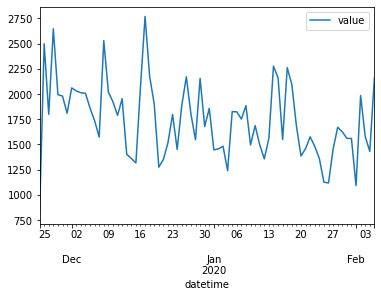

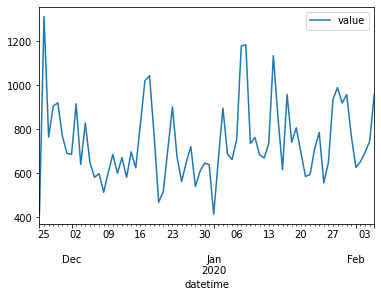

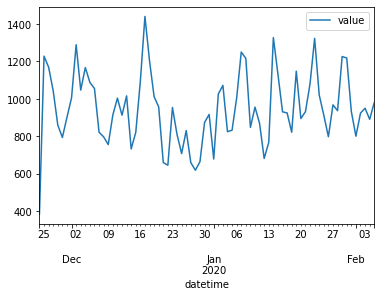

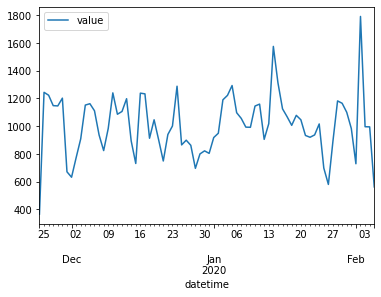

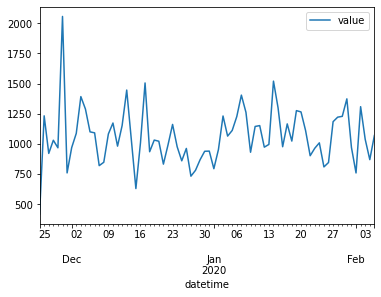

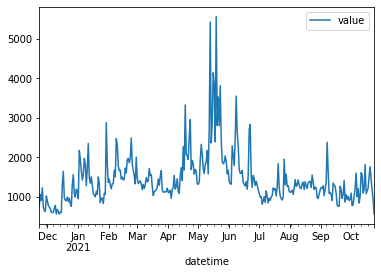

In [12]:
soc_df = san.get('social_volume_total/ethereum', interval='1d',from_date='2019-02-05',to_date='2020-02-05')
soc_df.plot()
plt.show()
soc_df = san.get('social_volume_telegram/bitcoin', interval='1d',from_date='2019-02-05',to_date='2020-02-05')
soc_df.plot()
plt.show()
soc_df = san.get('social_volume_reddit/bitcoin', interval='1d',from_date='2019-02-05',to_date='2020-02-05')
soc_df.plot()
plt.show()
soc_df = san.get('social_volume_twitter/bitcoin', interval='1d',from_date='2019-02-05',to_date='2020-02-05')
soc_df.plot()
plt.show()
soc_df = san.get('sentiment_positive_total/bitcoin', interval='1d',from_date='2019-02-05',to_date='2020-02-05')
soc_df.plot()
plt.show()
soc_df = san.get('sentiment_negative_total/bitcoin', interval='1d',from_date='2020-11-23',to_date='2021-11-23')
soc_df.plot()
plt.show()

In [2]:
soc_df = san.get('sentiment_negative_total/bitcoin', interval='1d',from_date='2021-11-10',to_date='2021-11-30')
soc_df.plot()
plt.show()

SanError: Error running query. Status code: 400.
 Apikey 'api-key-provided-by-sanbase' is malformed - it must have two string parts separated by underscore
 {
    query_0: getMetric(metric: "sentiment_negative_total"){
        timeseriesData(
            slug: "bitcoin"
            
            from: "2021-11-10T00:00:00+00:00"
            to: "2021-11-30T23:59:59+00:00"
            interval: "1d"
            aggregation: null
        ){
        datetime value
        }
    }
    }